In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 # result[i]의 특정 인덱스만 1로 설정
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

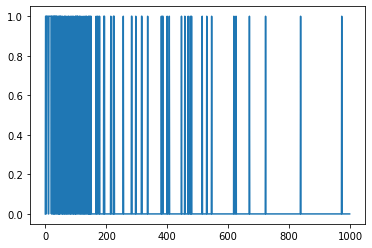

In [3]:
plt.plot(train_data[0])

# 베이스라인 모델

In [4]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data, train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.5457 - accuracy: 0.7245 - binary_crossentropy: 0.5457 - val_loss: 0.3973 - val_accuracy: 0.8302 - val_binary_crossentropy: 0.3973
Epoch 2/20
49/49 - 0s - loss: 0.3517 - accuracy: 0.8496 - binary_crossentropy: 0.3517 - val_loss: 0.3389 - val_accuracy: 0.8562 - val_binary_crossentropy: 0.3389
Epoch 3/20
49/49 - 0s - loss: 0.3167 - accuracy: 0.8692 - binary_crossentropy: 0.3167 - val_loss: 0.3326 - val_accuracy: 0.8586 - val_binary_crossentropy: 0.3326
Epoch 4/20
49/49 - 0s - loss: 0.3063 - accuracy: 0.8732 - binary_crossentropy: 0.3063 - val_loss: 0.3302 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3302
Epoch 5/20
49/49 - 0s - loss: 0.3028 - accuracy: 0.8756 - binary_crossentropy: 0.3028 - val_loss: 0.3293 - val_accuracy: 0.8598 - val_binary_crossentropy: 0.3293
Epoch 6/20
49/49 - 0s - loss: 0.2999 - accuracy: 0.8758 - binary_crossentropy: 0.2999 - val_loss: 0.3296 - val_accuracy: 0.8606 - val_binary_crossentropy: 0.3296
Epoch 7/20
49/49 - 0s - loss

# Hidden Unit: 작은 모델

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data, train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6654 - accuracy: 0.6205 - binary_crossentropy: 0.6654 - val_loss: 0.6106 - val_accuracy: 0.7470 - val_binary_crossentropy: 0.6106
Epoch 2/20
49/49 - 0s - loss: 0.5404 - accuracy: 0.7885 - binary_crossentropy: 0.5404 - val_loss: 0.4827 - val_accuracy: 0.8110 - val_binary_crossentropy: 0.4827
Epoch 3/20
49/49 - 0s - loss: 0.4334 - accuracy: 0.8299 - binary_crossentropy: 0.4334 - val_loss: 0.4067 - val_accuracy: 0.8357 - val_binary_crossentropy: 0.4067
Epoch 4/20
49/49 - 0s - loss: 0.3758 - accuracy: 0.8488 - binary_crossentropy: 0.3758 - val_loss: 0.3688 - val_accuracy: 0.8471 - val_binary_crossentropy: 0.3688
Epoch 5/20
49/49 - 0s - loss: 0.3457 - accuracy: 0.8594 - binary_crossentropy: 0.3457 - val_loss: 0.3510 - val_accuracy: 0.8528 - val_binary_crossentropy: 0.3510
Epoch 6/20
49/49 - 0s - loss: 0.3288 - accuracy: 0.8638 - binary_crossentropy: 0.3288 - val_loss: 0.3403 - val_accuracy: 0.8582 - val_binary_crossentropy: 0.3403
Epoch 7/20
49/49 - 0s - loss

# Hidden Unit: 큰 모델

In [8]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

bigger_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4303 - accuracy: 0.7968 - binary_crossentropy: 0.4303 - val_loss: 0.3429 - val_accuracy: 0.8542 - val_binary_crossentropy: 0.3429
Epoch 2/20
49/49 - 0s - loss: 0.2895 - accuracy: 0.8795 - binary_crossentropy: 0.2895 - val_loss: 0.3245 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3245
Epoch 3/20
49/49 - 0s - loss: 0.2236 - accuracy: 0.9112 - binary_crossentropy: 0.2236 - val_loss: 0.3396 - val_accuracy: 0.8548 - val_binary_crossentropy: 0.3396
Epoch 4/20
49/49 - 0s - loss: 0.1106 - accuracy: 0.9655 - binary_crossentropy: 0.1106 - val_loss: 0.4128 - val_accuracy: 0.8479 - val_binary_crossentropy: 0.4128
Epoch 5/20
49/49 - 0s - loss: 0.0240 - accuracy: 0.9960 - binary_crossentropy: 0.0240 - val_loss: 0.5388 - val_accuracy: 0.8464 - val_binary_crossentropy: 0.5388
Epoch 6/20
49/49 - 0s - loss: 0.0044 - accuracy: 0.9999 - binary_crossentropy: 0.0044 - val_loss: 0.6193 - val_accuracy: 0.8493 - val_binary_crossentropy: 0.6193
Epoch 7/20
49/49 - 0s - loss

# 히든 유닛 사이즈 모델 비교

In [12]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train'
                 )
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

    plt.xlim([0, max(history.epoch)])

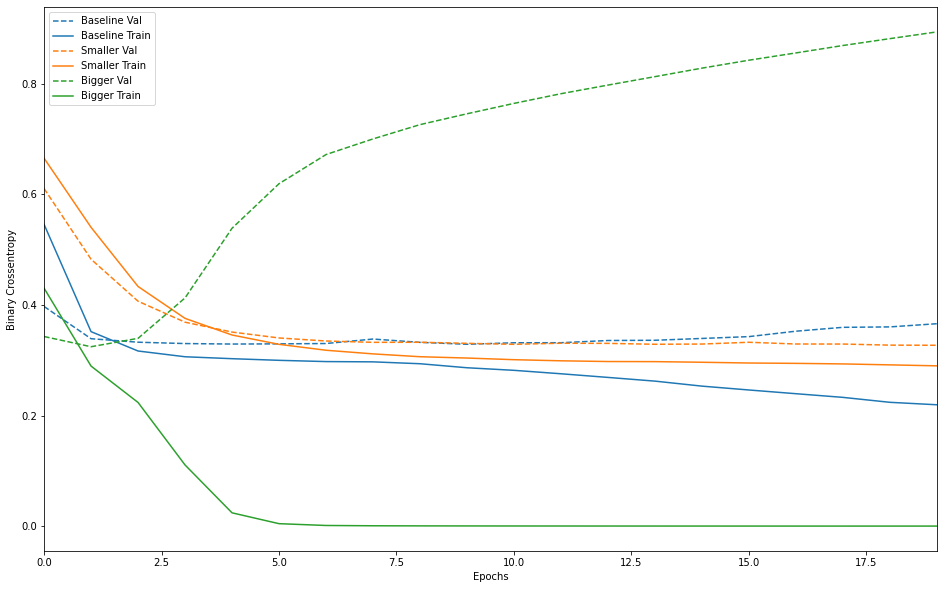

In [13]:
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

# L2 가중치 규제 모델

In [14]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6474 - accuracy: 0.6982 - binary_crossentropy: 0.6018 - val_loss: 0.5099 - val_accuracy: 0.8089 - val_binary_crossentropy: 0.4665
Epoch 2/20
49/49 - 0s - loss: 0.4300 - accuracy: 0.8423 - binary_crossentropy: 0.3867 - val_loss: 0.3907 - val_accuracy: 0.8543 - val_binary_crossentropy: 0.3476
Epoch 3/20
49/49 - 0s - loss: 0.3693 - accuracy: 0.8661 - binary_crossentropy: 0.3267 - val_loss: 0.3736 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.3320
Epoch 4/20
49/49 - 0s - loss: 0.3517 - accuracy: 0.8704 - binary_crossentropy: 0.3111 - val_loss: 0.3675 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3280
Epoch 5/20
49/49 - 0s - loss: 0.3434 - accuracy: 0.8737 - binary_crossentropy: 0.3048 - val_loss: 0.3681 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.3304
Epoch 6/20
49/49 - 0s - loss: 0.3381 - accuracy: 0.8761 - binary_crossentropy: 0.3012 - val_loss: 0.3622 - val_accuracy: 0.8598 - val_binary_crossentropy: 0.3262
Epoch 7/20
49/49 - 0s - loss

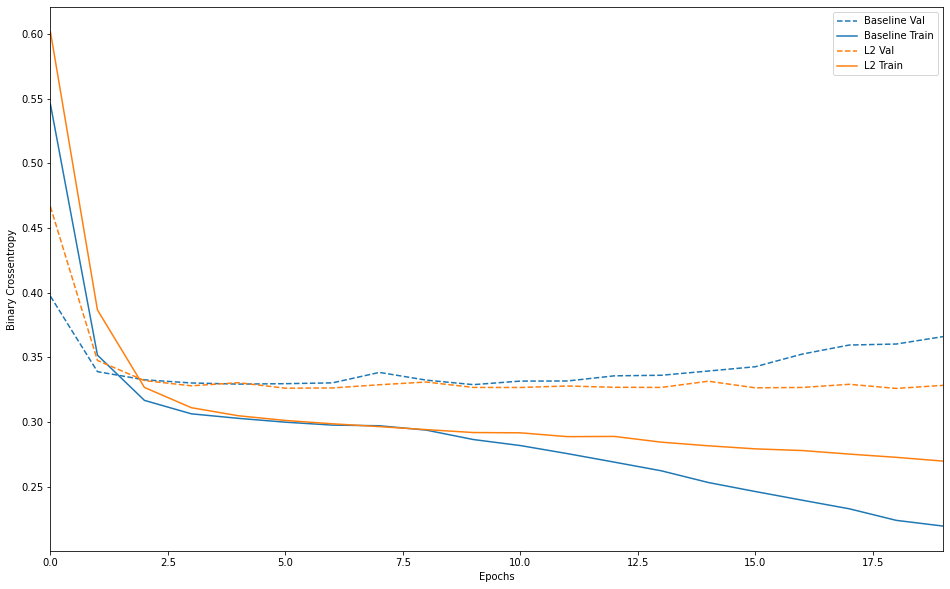

In [15]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

# Dropout 모델

In [19]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
              epochs=20,
              batch_size=512,
              validation_data=(test_data, test_labels),
              verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6822 - accuracy: 0.5513 - binary_crossentropy: 0.6822 - val_loss: 0.6339 - val_accuracy: 0.7398 - val_binary_crossentropy: 0.6339
Epoch 2/20
49/49 - 0s - loss: 0.5988 - accuracy: 0.6689 - binary_crossentropy: 0.5988 - val_loss: 0.4899 - val_accuracy: 0.8194 - val_binary_crossentropy: 0.4899
Epoch 3/20
49/49 - 0s - loss: 0.5165 - accuracy: 0.7498 - binary_crossentropy: 0.5165 - val_loss: 0.4076 - val_accuracy: 0.8442 - val_binary_crossentropy: 0.4076
Epoch 4/20
49/49 - 0s - loss: 0.4573 - accuracy: 0.7933 - binary_crossentropy: 0.4573 - val_loss: 0.3650 - val_accuracy: 0.8528 - val_binary_crossentropy: 0.3650
Epoch 5/20
49/49 - 0s - loss: 0.4234 - accuracy: 0.8203 - binary_crossentropy: 0.4234 - val_loss: 0.3394 - val_accuracy: 0.8576 - val_binary_crossentropy: 0.3394
Epoch 6/20
49/49 - 0s - loss: 0.3963 - accuracy: 0.8374 - binary_crossentropy: 0.3963 - val_loss: 0.3295 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.3295
Epoch 7/20
49/49 - 0s - loss

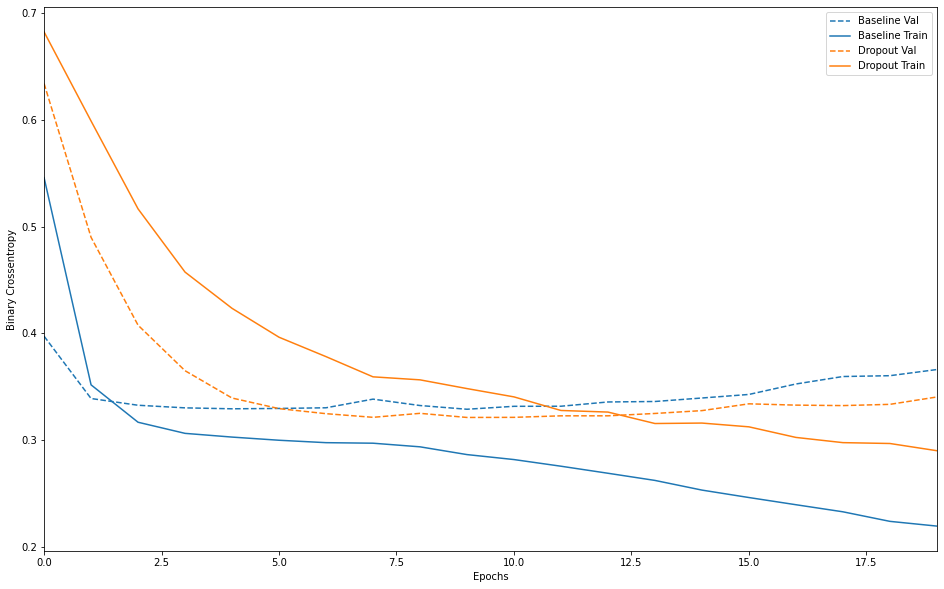

In [20]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])